<h1 style="color:rgb(0,120,170)">Neural Networks and Deep Learning</h1>
<h2 style="color:rgb(0,120,170)">Intro to Tensor Flow and Keras - simple model</h2>


! pip install -U tensorflow tensorboard

In [1]:
import os
import sys
import re
import time
import datetime
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorboard.plugins.hparams import api_pb2
from tensorboard.plugins.hparams import summary as hparams_summary

from google.protobuf import struct_pb2

%load_ext tensorboard
%matplotlib inline

In [2]:
print(tf.__version__)
try:
    physical_devices = tf.config.list_physical_devices('GPU') 
    #tf.config.experimental.set_memory_growth(physical_devices[0], True)
    for device in physical_devices:
        tf.config.experimental.set_memory_growth(device, True)
    print(physical_devices)
except:
    print("No GPU")

2.8.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2022-02-19 10:09:42.894193: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-19 10:09:42.922405: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-19 10:09:42.922560: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [3]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

First we'll develop a small ANN with Keras:

In [4]:
# load pima indians dataset
dataset = np.loadtxt("../../../data/pima-indians-diabetes.csv", delimiter=",")

In [5]:
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [6]:
#https://www.tensorflow.org/api_docs/python/tf/keras/layers
#https://www.tensorflow.org/api_docs/python/tf/keras/activations
#https://www.tensorflow.org/api_docs/python/tf/keras/initializers
#https://www.tensorflow.org/api_docs/python/tf/keras/losses
#https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
#https://www.tensorflow.org/api_docs/python/tf/keras/metrics

# Create model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(12, input_dim=8, activation="relu", kernel_initializer="uniform"))
model.add(tf.keras.layers.Dense(8, activation="relu", kernel_initializer="uniform"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid", kernel_initializer="uniform"))

2022-02-19 10:09:42.947786: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-19 10:09:42.948277: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-19 10:09:42.948474: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-19 10:09:42.948622: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

In [7]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=200, batch_size=10, verbose=1)

Epoch 1/200
52/52 [==============================] - 1s 5ms/step - loss: 0.6827 - accuracy: 0.6401 - val_loss: 0.6665 - val_accuracy: 0.6732
Epoch 2/200
52/52 [==============================] - 0s 2ms/step - loss: 0.6693 - accuracy: 0.6401 - val_loss: 0.6541 - val_accuracy: 0.6732
Epoch 3/200
52/52 [==============================] - 0s 2ms/step - loss: 0.6617 - accuracy: 0.6381 - val_loss: 0.6534 - val_accuracy: 0.6811
Epoch 4/200
52/52 [==============================] - 0s 2ms/step - loss: 0.6560 - accuracy: 0.6323 - val_loss: 0.6490 - val_accuracy: 0.6732
Epoch 5/200
52/52 [==============================] - 0s 2ms/step - loss: 0.6490 - accuracy: 0.6401 - val_loss: 0.6432 - val_accuracy: 0.6732
Epoch 6/200
52/52 [==============================] - 0s 2ms/step - loss: 0.6436 - accuracy: 0.6518 - val_loss: 0.6409 - val_accuracy: 0.6811
Epoch 7/200
52/52 [==============================] - 0s 2ms/step - loss: 0.6380 - accuracy: 0.6498 - val_loss: 0.6266 - val_accuracy: 0.6890
Epoch 8/200
5

In [9]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


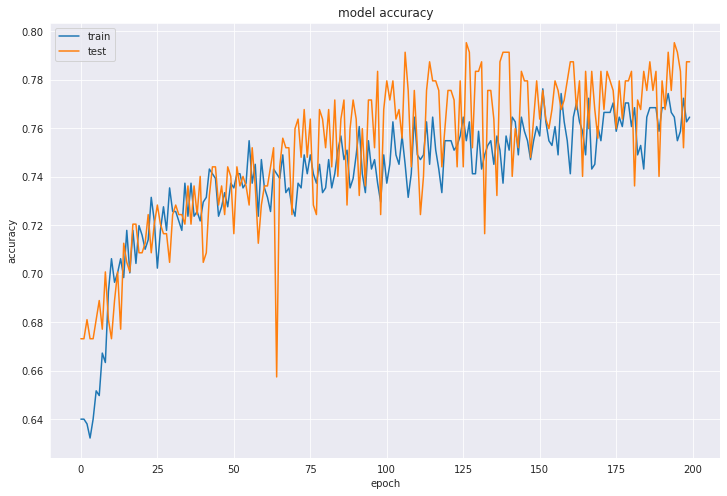

In [10]:
# summarize history for accuracy
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

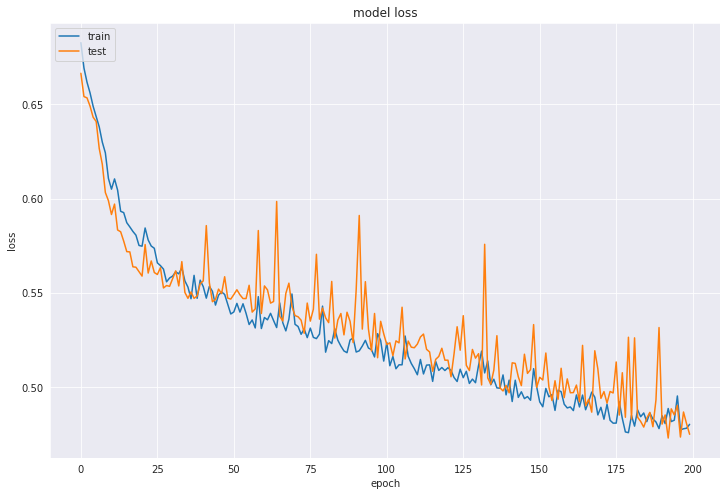

In [11]:
# summarize history for loss
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
# evaluate the model
scores = model.evaluate(X, Y)
print("\n{}: {}".format(model.metrics_names[1], scores[1]*100))

24/24 [==============================] - 0s 1ms/step - loss: 0.4674 - accuracy: 0.7786

accuracy: 77.86458134651184


In [13]:
# calculate predictions
predictions = model.predict(X)
rounded = [round(x[0]) for x in predictions]

for pred in list(zip(predictions[0:10], rounded[0:10])):
    print(pred)

(array([0.63955873], dtype=float32), 1)
(array([0.12967877], dtype=float32), 0)
(array([0.8845339], dtype=float32), 1)
(array([0.0823413], dtype=float32), 0)
(array([0.86109966], dtype=float32), 1)
(array([0.27625063], dtype=float32), 0)
(array([0.15164167], dtype=float32), 0)
(array([0.7355553], dtype=float32), 1)
(array([0.668433], dtype=float32), 1)
(array([0.09582914], dtype=float32), 0)
